1. importing liblaries

In [ ]:
import pandas as pd

The pandas library was imported for structured tabular data manipulation.
pandas provides functions for reading CSVs, handling missing values and performing group-wise aggregations.

2. Load datasets

In [ ]:
dist = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
sub = pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')

We loaded two CSV files into Python: one with district data and one with subcounty data.
We kept them separate so that we don’t mix up the details. This way, we can study patterns at both the district level and the subcounty level without losing important information or making wrong conclusions.

3.  Missing values check

In [ ]:
print(sub.isnull().sum())

OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64


we checked each column to see how many values were missing.
Knowing how many values are missing helps us decide what to do next. whether to remove those rows or fill in the gaps with replacement values.

4. Remove duplicate rows

In [ ]:
sub = sub.drop_duplicates()
dist = dist.drop_duplicates()

We deleted any rows that were repeated in the datasets.
Removing Repeated rows makes sure each record is only counted once.

5. clean Subcounty_Name

In [ ]:
if "SUBCOUNTY_NAME" in sub.columns:
    sub["SUBCOUNTY_NAME"] = sub["SUBCOUNTY_NAME"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

if "DISTRICT_NAME" in sub.columns:
    sub["DISTRICT_NAME"] = sub["DISTRICT_NAME"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

if "DISTRICT_NAME" in dist.columns:
    dist["DISTRICT_NAME"] = dist["DISTRICT_NAME"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)


We cleaned the text in the Subcounty_Name and District_Name columns by making sure the values are treated as text.

6. Drop unneeded columns

In [ ]:
sub = sub.drop(['OBJECTID', 'Area', 'Karamoja'], axis=1)
dist = dist.drop(['OBJECTID', 'Area'], axis=1)

We removed the columns OBJECTID, Area, and Karamoja from the dataset.
These columns don’t add useful information for our analysis.

7. Preview last rows

In [ ]:
dist.tail(10)

,NAME,POP,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,ABIM,90385,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,AMUDAT,101790,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,KAABONG,627057,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,KOTIDO,243157,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,MOROTO,127811,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,NAKAPIRIPIRIT,146780,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,NAPAK,167625,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


Displayed last 10 rows of district dataset.

In [ ]:
sub.tail(10)

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
42,LOPEEI,NAPAK,18815,108.156411,1053.257168,3120.318045,2121.747320,955.264617,229480.57590,1.006139e+06
43,LORENGECORA,NAPAK,2503,184.081197,841.815010,1031.196285,672.121886,358.550335,123725.00130,3.018331e+05
44,LOTOME,NAPAK,17834,128.555598,507.907068,1849.966589,1770.358693,78.035892,227589.51980,3.963498e+04
45,MATANY,NAPAK,29495,130.007687,497.353282,2990.847377,2664.796115,288.329571,346443.97860,1.434017e+05
46,NAPAK TOWN COUNCIL,NAPAK,8010,175.828068,725.813930,792.249273,386.158033,401.173442,67897.42082,2.911773e+05
47,NGOLERIET,NAPAK,20790,134.084089,528.699822,1215.227445,1145.339875,68.124005,153571.85410,3.601715e+04
48,NYAKWAE,ABIM,16470,329.759030,779.225031,792.898789,342.816838,331.111340,113046.94800,2.580102e+05
49,LOKOPO,NAPAK,23200,120.862232,748.829862,6471.047334,5830.549392,553.543123,704693.21440,4.145096e+05
50,RUPA,MOROTO,41493,114.270921,699.334309,2217.290717,1989.119508,222.838881,227298.51840,1.558389e+05
51,MORUITA,NAKAPIRIPIRIT,16588,430.557375,1248.955812,1161.390229,185.283445,959.671162,79775.15368,1.198587e+06


Displayed last 10 rows of district dataset.

8. Sum of maize yields

In [ ]:
print(sub['M_Yield_Ha'].sum())
print(dist['M_Yield_Ha'].sum())

48893.4967171
6903


Summed maize yield for both datasets

9. Sum of sorghum yields

In [ ]:
print(dist['S_Yield_Ha'].sum())
print(sub['S_Yield_Ha'].sum())

1885
14256.601065099998


Summed sorghum yield for both datasets

10. Hypothesis test on sorghum vs. maize yields

In [ ]:
import pandas as pd
from scipy import stats

df = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')

sorghum = df["S_Yield_Ha"].dropna()
maize = df["M_Yield_Ha"].dropna()

t_stat, p_val = stats.ttest_ind(sorghum, maize, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject H0: Sorghum and maize yields are significantly different.")
else:
    print("Fail to reject H0: No significant difference in yields.")

t-statistic: -14.011852622032855
p-value: 2.9515543187263105e-21
Reject H0: Sorghum and maize yields are significantly different.


A statistical test was run to compare the average yield per hectare of sorghum and maize.  
The test checks if the difference in yields between sorghum and maize is statistically significant or just due to random chance. This helps determine whether one crop consistently outperforms the other.

11. Linear regression for maize production

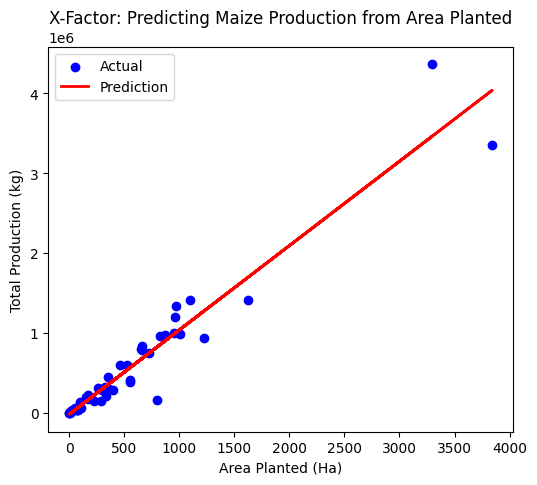

Slope (kg per Ha): 1055.3242171266625
Intercept: -15897.999882884207
R² Score: 0.9262980197825493


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")

X = df[["M_Area_Ha"]]
y = df["M_Prod_Tot"]

model = LinearRegression()
model.fit(X, y)

df["Predicted_Production"] = model.predict(X)

plt.figure(figsize=(6,5))
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, df["Predicted_Production"], color="red", linewidth=2, label="Prediction")
plt.xlabel("Area Planted (Ha)")
plt.ylabel("Total Production (kg)")
plt.title("X-Factor: Predicting Maize Production from Area Planted")
plt.legend()
plt.show()

print("Slope (kg per Ha):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))

A simple linear regression model was built to predict maize production based on the area planted .
This analysis shows how strongly the area planted influences total maize production. The regression slope indicates how many kilograms of maize are produced per additional hectare, while the R² score measures how well area planted explains production.

12. Distribution of sorghum yields

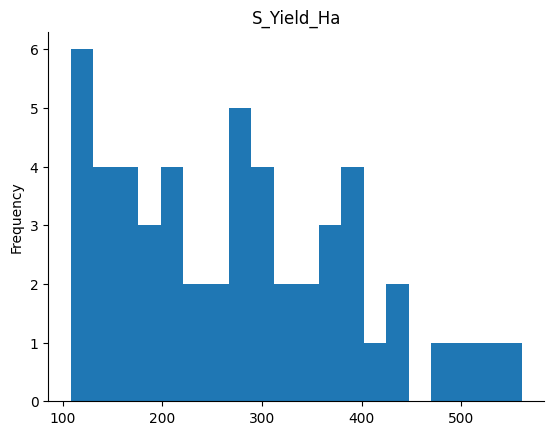

In [ ]:
from matplotlib import pyplot as plt
sub['S_Yield_Ha'].plot(kind='hist', bins=20, title='S_Yield_Ha')
plt.gca().spines[['top', 'right',]].set_visible(False)

A histogram of sorghum yields per hectare was created with 20 bins, showing how the values are spread across subcounties.  
Plotting the distribution helps reveal patterns such as whether most subcounties have low, medium, or high yields, and whether there are any outliers. This makes it easier to understand the variability of sorghum performance.  

13. Subcounty counts per district

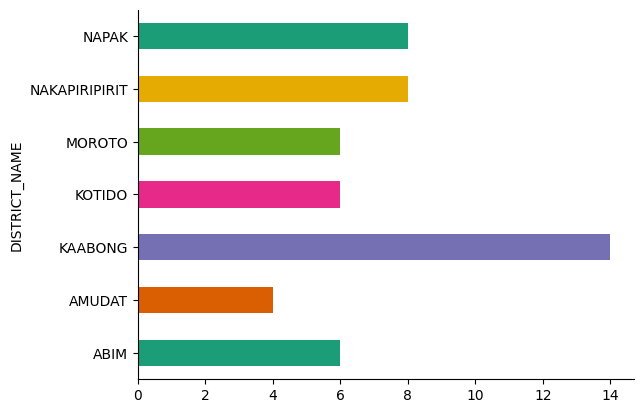

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sub.groupby('DISTRICT_NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

A horizontal bar chart was created to show how many subcounties belong to each district.  
This visualization highlights the variation in administrative structure across districts. Knowing how many subcounties fall within each district provides important context for interpreting crop yield and population data at different levels.  


14. Distribution of sorghum yields by district

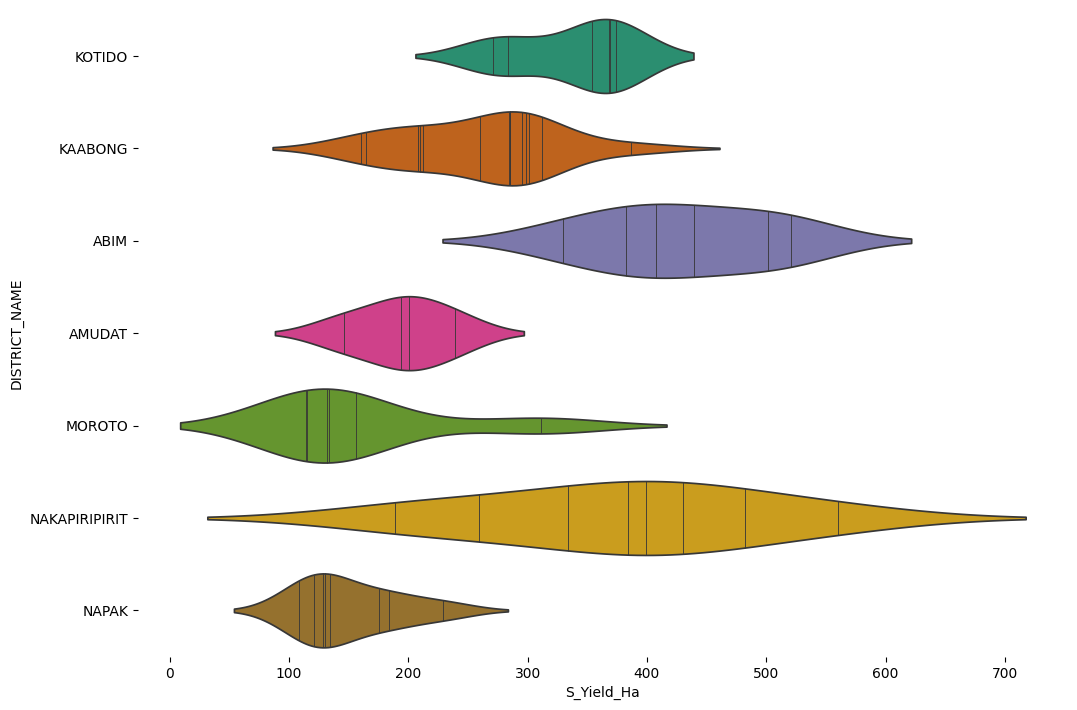

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(sub['DISTRICT_NAME'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(
    data=sub,
    x='S_Yield_Ha',
    y='DISTRICT_NAME',
    inner='stick',
    palette='Dark2',
    hue='DISTRICT_NAME',   # add this
    legend=False           # stop duplicate legend
)

sns.despine(top=True, right=True, bottom=True, left=True)

A violin plot was created to show how sorghum yield per hectare is distributed within each district.
This visualization makes it easy to compare yield patterns across districts. It highlights not just averages but also the variability within each district, showing where yields are more consistent versus where they fluctuate widely.  


15. Relationship between sorghum and maize yields

Correlation: 0.6244943671192505


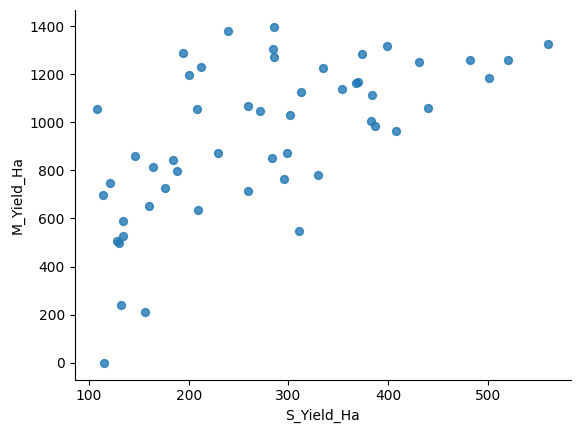

In [46]:
from matplotlib import pyplot as plt
sub.plot(kind='scatter', x='S_Yield_Ha', y='M_Yield_Ha', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
corr = sub["S_Yield_Ha"].corr(sub["M_Yield_Ha"])
print("Correlation:", corr)

A scatter plot was created with sorghum yield per hectare  on the x-axis and maize yield per hectare on the y-axis. Each point represents a subcounty.  
The scatter plot helps reveal that subcounties with higher sorghum yields also tend to have higher maize yields.


16. Correlation between population and sorghum yields

Correlation: -0.08138490275184114


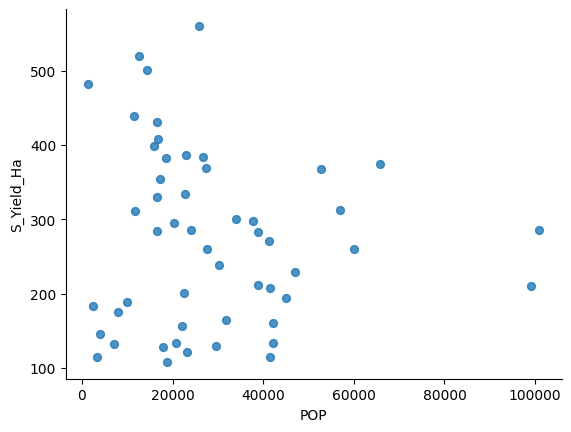

In [47]:
from matplotlib import pyplot as plt
sub.plot(kind='scatter', x='POP', y='S_Yield_Ha', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
corr = sub["POP"].corr(sub["S_Yield_Ha"])
print("Correlation:", corr)

A scatter plot was created with population on the x-axis and sorghum yield per hectare on the y-axis. The correlation coefficient between the two variables was also calculated.  
This step checks whether subcounties with larger populations tend to have higher or lower sorghum yields. The correlation was weak and slightly negative (–0.08), meaning population size does not strongly explain differences in sorghum yields.  

17. Exporting cleaned datasets

In [ ]:
sub.to_excel("subcounties_clean.xlsx", index=False)
dist.to_excel("districts_clean.xlsx", index=False)

The cleaned subcounty and district DataFrames were saved into separate Excel files.  
Exporting the processed data makes it easy to use in external tools like Tableau for visualization

18. Downloading cleaned datasets

In [ ]:
from google.colab import files

files.download("subcounties_clean.xlsx")
files.download("districts_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The cleaned subcounty and district Excel files were downloaded from Google Colab to the local computer using files.download.  
Downloading allows the cleaned datasets to be shared and imported into external software for further analysis and visualization.  